#### Amol Kaushik
#### kaushikamol@gmail.com

# Capstone - Spam Review Detection
## Amazon Dataset for Cell Phones and Accessories Reviews

# Notebook 3 - Advanced Modelling
### Notebook: 3/3

# Table Of Contents

1. [Introduction](#Introduction)
2. [Data Dictionary](#DataDictionary)
3. [Data Setup](#DataSetup)
    * Load Data
    * Data Checks/Exploration
    * Data Split
4. [Modelling](#Modelling)
    * Baseline LogisticRegression
2. [Advanced Modelling](#AdvModelling)
    * ML Pipeline + GridSearch
    * Best Models and Params
    * Model Evaluation and Comparison
    * Final Model
3. [Conclusion](#Conclusion)

In [5]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() #setting the theme for the plots

# 1 - Introduction<a id = 'Introduction'></a>

### Objective of Capstone Project:
I aim to build an accurate and effective ML model to identify Spam Reviews posted on Amazon for purchased products.

### What value does this project bring:
This project aims to reduce the sale of sub-par products that get highly recommended on the basis of fake/spam reviews and ratings.

# 2 - Data Dictionary:
- helpful: Votes for the extent of Helpfulness of the review [Positive, Negative]
- reviewText: The review posted by the reviewer/customer (Vectorized)
- summary: Provides a brief summary of the Product Review (Vectorized)
- class: Spam identifier (0 = not spam, 1 = spam)

Lets import the libraries:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 3 - Data Setup

### Loading the Data
The datasets are the TF-IDF Vectorised versions saved at the conclusion of Notebook 2.
Loading the cleaned dataset from the previous notebook:

If working on Google Colab, load the data via code below:

In [7]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Load the saved CSVs from notebook 2 on Google Drive
X_remainder = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/Data/X_remainder_vect_tfidf.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/Data/X_test_vect_tfidf.csv')
y_remainder = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/Data/y_remainder.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/Data/y_test.csv')

If working from a local machine, load the data via code below:

In [9]:
# # Load the saved CSVs from notebook 2
# X_remainder = pd.read_csv('Data/X_remainder_vect_tfidf.csv')
# X_test = pd.read_csv('Data/X_test_vect_tfidf.csv')
# y_remainder = pd.read_csv('Data/y_remainder.csv')
# y_test = pd.read_csv('Data/y_test.csv')

### Data Checks/Exploration

Lets do a quick check for missing data on the datasets:

In [10]:
# Checking to see if there is any missing data
print(X_remainder.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_remainder.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


In [11]:
X_remainder

,help_neg,help_pos,r_00,r_10,r_100,r_12,r_15,r_20,r_30,r_34,...,s_wrong,s_yay,s_year,s_years,s_yellow,s_yes,s_zagg,s_zebra,s_zero,s_zte
0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.266453,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55526,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55527,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55528,2,1,0.0,0.0,0.0,0.0,0.0,0.341621,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55529,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_test

,help_neg,help_pos,r_00,r_10,r_100,r_12,r_15,r_20,r_30,r_34,...,s_wrong,s_yay,s_year,s_years,s_yellow,s_yes,s_zagg,s_zebra,s_zero,s_zte
0,2,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23794,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23795,0,0,0.0,0.0,0.0,0.0,0.0,0.204161,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23796,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.289831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23797,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y_remainder

,class
0,1
1,1
2,1
3,0
4,1
...,...
55526,1
55527,1
55528,0
55529,1


In [14]:
y_test

,class
0,0
1,1
2,0
3,0
4,1
...,...
23794,1
23795,1
23796,0
23797,1


Great, there is no missing data in either dataset, and they all seem to have loaded properly.

Lets proceed with the LogisticRegression model to get some baseline scores:

# 4 - Modelling

### Baseline LogisticRegression

A LogisticRegression model will be run on the remainder and test set after they have been scaled using the MinMax Scaler, and no hyperparameters set, except a random state of 1, within the model.

In [15]:
# First we need to scale the data
# Majority of data is binary so the MinMaxScaler will be used
scaler = MinMaxScaler()

In [16]:
# Fitting the scaler to the remainder dataset
scaler.fit(X_remainder)

MinMaxScaler()

In [17]:
# Scaling the X remainder and test datasets
X_remainder_scaled = scaler.transform(X_remainder)
X_test_scaled = scaler.transform(X_test)

The data has been scaled.

Lets run the baseline model:

In [18]:
# Baseline logistic regression
# Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_remainder_scaled, y_remainder)

# Print the accuracies
print(f'Accuracy on remainder set: {baseline_logreg.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.9030271379949938
Accuracy on test set: 0.8897852850960124


We'll keep these accuracies in mind for comparing against the optimal model found by the GridSearch later.

Now the X_test set can be kept as is for scoring the final model further down the line, but we need to proceed with splitting the X_remainder into X_train and X_validation sets:

### Data Split - Train and Validation

The X/y remainder datasets will be further split into X/y train and validation sets

In [19]:
# Splitting the original remainder dataset in train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3,
                                                                                            random_state = 1, stratify = y_remainder)

In [20]:
#Lets take a look at the shape of the new train and validation datasets
print(f'X_train has {X_train.shape[0]} rows, and {X_train.shape[1]} columns')
print(f'X_validation has {X_validation.shape[0]} rows, and {X_validation.shape[1]} columns')

X_train has 38871 rows, and 1892 columns
X_validation has 16660 rows, and 1892 columns


For the train and validation splits, the stratify has been set to match y_remainder. Stratify aims to maintain the class proportions in the newly split dataset.

Lets check if the class proportions have been maintained:

In [21]:
print('Proportions in remainder set:')
print(y_remainder.value_counts(normalize=True), '\n')

print('Proportions in test set:')
print(y_test.value_counts(normalize=True), '\n')

print('Proportions in train set:')
print(y_train.value_counts(normalize=True), '\n')

print('Proportions in validation set:')
print(y_validation.value_counts(normalize=True), '\n')

Proportions in remainder set:
class
1        0.704003
0        0.295997
dtype: float64 

Proportions in test set:
class
1        0.704021
0        0.295979
dtype: float64 

Proportions in train set:
class
1        0.703995
0        0.296005
dtype: float64 

Proportions in validation set:
class
1        0.704022
0        0.295978
dtype: float64 



Looks like the class proportions have been maintained among the dataset splits. Due to the limited availability of data points, the exact same class proportions could not be maintained among all the split sets, but the differences are quite minor, and will not have any major effect on the models.

The train and validation datasets will be used in the pipeline for hyperparameter optimisation and cross-validation.

Let's continue with setting up the pipeline and grid search for cross-validation:

# 5 - Advanced Modelling

### ML Pipeline and GridSearch

First, the esimators need to set-up, these will inlclude the following 3 parameters within it:
- Scaler: the scaler type to be employed for scaling the train and validation datasets
- Model: the type of model which will be employed to running the analysis

For the GridSearch a dimension reducer will not be used due to the fact that reducing the dimentionality resulted in a decrease in the mnodel accuracy in Notebook 2.

Lets set-up the esimators:

In [22]:
# Setting up the estimators and pipeline
estimators = [
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression())
]

In [23]:
# Set up a directory to cache the pipeline results
from tempfile import mkdtemp
cachedir = mkdtemp()

# Instantiate the pipeline
my_pipe = Pipeline(estimators, memory=cachedir)

### Why were these specific models and hyperparameters selected for the Pipeline/GridSearch:

#### Logistic Regression
LogisticRegression is the a great and simple model that can be used for classification probelsm. It is quick to run and not very computationally heavy.

Solvers:
* LibLinear - good for high dimension datasets
* SAGA - works well on large datasets with feature matrix that is sparse (contains many 0 values) and allows for L1 regularisation, plus it is less computationally heavy (time-efficient)

Penalty:
* L1 - allows for some dimensionality reduction through regularisation

#### SVM (Support Vector Machines)
SVMs are good for working with high dimentional data such as the vectorised data I have.

Kernels: (I had to remove the kernel parameters due to computational limitations)
* Linear Kernel - used for text categorisation and large sparce datasets
* RBF Kernel - used when there is no prior knowledge of the data and when the number of observation is greater then the number of features and for finding non-linear splits for the classification of the data

#### Random Forest
Random Forest model(bagging method) is good at both regression and classification problems, and works well with large datasets without much runtime comprmise and heavy computation requirements.

Number of Estimators - how many splits the decision tree can make

Max Depth - the limit after which the decision tree will stop splitting

#### XGBoost
XGBoost model is good at working with large datasets.

Number of Estimators - the number of boosting stages

Max Depth - the limit after which the model will stop splitting

Learning Rate - the speed at which a model learns

LogisticRegression Parameters not being used:
* Penalty = L2 - not used because it does not perform feature selection, and is not robust to outliers
* Solver = lbfgs - not used since it does not work with the L1 penalty

Now, the parameters grid needs to be set-up. This will be a compilation of all the different models, and their hyperparameter combinations that I will want to test in order to find the best model with its optimal hyperparameters.

The following scalers, dimension reducers, models, and model hyperparameters will be used:
1. Scalers:
    - MinMax Scaler
2. Dimension reducers: (had to be dropped due to computation limits)
    - PCA
    - KernelPCA
        * Number of components = range[2, 1900, 100] # This hyperparameter applies to all the dim reducers
3. Models and Hyperparameters:
    - LogisticRegression
        * C_values = [.1, 1, 10]
        * Penalty = l1
        * Solver = liblinear, saga
        * Random State = 1
    - LinearSVM
        * C_values = [.01, .1, 1]
        * Penalty = l1, l2
        * Random State = 1
    - Random Forrest
        * Number of estimators = range(8, 13)
        * Max Depth = range(40, 46, 2)
        * Random State = 1
    - XGBoost
        * Number of estimators = range(50, 53, 2)
        * Max Depth = range(8, 11, 2)
        * Random State = 1
        * Learning Rate = [0.5, 1]

Lets start setting up the Parameters Grid

In [24]:
y_train.shape

(38871, 1)

In [25]:
y_train.values.ravel().shape

(38871,)

For using the y_train to fit the GridSearch model, the y_train dataset needs to be converted into an array (only rows). Currently, as seen from the y_train shape check above, there is one column present, this will not work with the GridSearch, and will cause it to throw errors. The y_train dataset nneds to be flattened for fitting to the GridSearch, this can be done using the np.ravel() function.

In [26]:
# Range of C values to try
c_values = [.1, 1, 10]

# Logistic Regression Parameter grid
logreg_param_grid = [
    
    {'scaler': [MinMaxScaler()],
     'model': [LogisticRegression(penalty = 'l1', random_state = 1)],
     'model__C': c_values,
     'model__solver': ['liblinear', 'saga']}
     ]

In [27]:
# Range of C values to try
c_values = [.01, .1, 1]

# SVM Parameter grid
svm_param_grid = [

    {'scaler': [MinMaxScaler()],
     'model': [LinearSVC(random_state = 1)], 
     'model__C': c_values,
     'model__penalty': ['l1', 'l2']}
   
]

In [28]:
# Random Forest Parameter grid
rf_param_grid = [
     
    {'scaler': [MinMaxScaler()],
     'model': [RandomForestClassifier(random_state = 1)], 
     'model__n_estimators': range(8, 13),
     'model__max_depth': range(40, 46, 2)}

]

In [29]:
# Parameter grid
xgb_param_grid = [

    {'scaler': [MinMaxScaler()],
     'model': [XGBClassifier(random_state = 1)], 
     'model__n_estimators': range(50, 53, 2),
     'model__max_depth': range(8, 11, 2),
     'model__learning_rate': [0.5, 1]}
   
]

In [30]:
# Instantiate the grid search for each model
logreg_grid = GridSearchCV(my_pipe, param_grid = logreg_param_grid, cv = 5, verbose = 2)

svm_grid = GridSearchCV(my_pipe, param_grid = svm_param_grid, cv = 5, verbose = 2)

rf_grid = GridSearchCV(my_pipe, param_grid = rf_param_grid, cv = 5, verbose = 2)

xgb_grid = GridSearchCV(my_pipe, param_grid = xgb_param_grid, cv = 5, verbose = 2)

In [31]:
# Fit the grid search for all models

logreg_fitted_grid = logreg_grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END model=LogisticRegression(penalty='l1', random_state=1), model__C=0.1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   8.1s
[CV] END model=LogisticRegression(penalty='l1', random_state=1), model__C=0.1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   6.1s
[CV] END model=LogisticRegression(penalty='l1', random_state=1), model__C=0.1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   5.9s
[CV] END model=LogisticRegression(penalty='l1', random_state=1), model__C=0.1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   6.4s
[CV] END model=LogisticRegression(penalty='l1', random_state=1), model__C=0.1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   7.9s
[CV] END model=LogisticRegression(penalty='l1', random_state=1), model__C=0.1, model__solver=saga, scaler=MinMaxScaler(); total time=  25.3s
[CV] END model=LogisticRegression(penalty='l1', random_state=1), mode

In [32]:
svm_fitted_grid = svm_grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l1, scaler=MinMaxScaler(); total time=   2.6s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l1, scaler=MinMaxScaler(); total time=   1.7s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l1, scaler=MinMaxScaler(); total time=   1.7s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l1, scaler=MinMaxScaler(); total time=   1.7s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l1, scaler=MinMaxScaler(); total time=   1.7s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l2, scaler=MinMaxScaler(); total time=   2.1s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l2, scaler=MinMaxScaler(); total time=   2.2s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__penalty=l2, scaler=MinMaxScaler(); total time=   2

In [33]:
rf_fitted_grid = rf_grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=40, model__n_estimators=8, scaler=MinMaxScaler(); total time=   4.0s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=40, model__n_estimators=8, scaler=MinMaxScaler(); total time=   3.8s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=40, model__n_estimators=8, scaler=MinMaxScaler(); total time=   3.8s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=40, model__n_estimators=8, scaler=MinMaxScaler(); total time=   3.8s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=40, model__n_estimators=8, scaler=MinMaxScaler(); total time=   3.8s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=40, model__n_estimators=9, scaler=MinMaxScaler(); total time=   4.1s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=40, model__n_estimato

In [34]:
xgb_fitted_grid = xgb_grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END model=XGBClassifier(random_state=1), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=50, scaler=MinMaxScaler(); total time= 2.5min
[CV] END model=XGBClassifier(random_state=1), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=50, scaler=MinMaxScaler(); total time= 2.5min
[CV] END model=XGBClassifier(random_state=1), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=50, scaler=MinMaxScaler(); total time= 2.5min
[CV] END model=XGBClassifier(random_state=1), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=50, scaler=MinMaxScaler(); total time= 2.4min
[CV] END model=XGBClassifier(random_state=1), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=50, scaler=MinMaxScaler(); total time= 2.4min
[CV] END model=XGBClassifier(random_state=1), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=52, scaler=MinMaxScaler(); total time=

### Best Models and Params

Now that the GridSearch has finished fitting/running the best hyperparameters can be checked for each model:

In [35]:
# Checking for the best hyperparameters combination for each model

print(logreg_fitted_grid.best_estimator_)

print(svm_fitted_grid.best_estimator_)

print(rf_fitted_grid.best_estimator_)

print(xgb_fitted_grid.best_estimator_)

Pipeline(memory='/tmp/tmpemd22ikc',
         steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=1, penalty='l1', random_state=1,
                                    solver='saga'))])
Pipeline(memory='/tmp/tmpemd22ikc',
         steps=[('scaler', MinMaxScaler()),
                ('model', LinearSVC(C=0.1, random_state=1))])
Pipeline(memory='/tmp/tmpemd22ikc',
         steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=44, n_estimators=12,
                                        random_state=1))])
Pipeline(memory='/tmp/tmpemd22ikc',
         steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(learning_rate=0.5, max_depth=8, n_estimators=52,
                               random_state=1))])


In [36]:
# Print the accuracies from the best models

print(f"The best logistic regression's accuracy on the validation set: {logreg_fitted_grid.best_estimator_.score(scaler.transform(X_validation), y_validation)}")
print(f"The best logistic regression's accuracy on the remainder set: {logreg_fitted_grid.best_estimator_.score(X_remainder_scaled, y_remainder)}")
print(f"The best logistic regression's accuracy on the test set: {logreg_fitted_grid.best_estimator_.score(X_test_scaled, y_test)}\n")

print(f"The best svm's accuracy on the validation set: {svm_fitted_grid.best_estimator_.score(scaler.transform(X_validation), y_validation)}")
print(f"The best svm's accuracy on the remainder set: {svm_fitted_grid.best_estimator_.score(X_remainder_scaled, y_remainder)}")
print(f"The best svm's accuracy on the test set: {svm_fitted_grid.best_estimator_.score(X_test_scaled, y_test)}\n")

print(f"The best random forest's accuracy on the validation set: {rf_fitted_grid.best_estimator_.score(scaler.transform(X_validation), y_validation)}")
print(f"The best random forest's accuracy on the remainder set: {rf_fitted_grid.best_estimator_.score(X_remainder_scaled, y_remainder)}")
print(f"The best random forest's accuracy on the test set: {rf_fitted_grid.best_estimator_.score(X_test_scaled, y_test)}\n")

print(f"The best xgboost's accuracy on the validation set: {xgb_fitted_grid.best_estimator_.score(scaler.transform(X_validation), y_validation)}")
print(f"The best xgboost's accuracy on the remainder set: {xgb_fitted_grid.best_estimator_.score(X_remainder_scaled, y_remainder)}")
print(f"The best xgboost's accuracy on the test set: {xgb_fitted_grid.best_estimator_.score(X_test_scaled, y_test)}\n")

# Print the accuracies from the baseline LogisticRegression for comparison
print(f'Baseline LogisticRegression accuracy on remainder set: {baseline_logreg.score(X_remainder_scaled, y_remainder)}')
print(f'Baseline LogisticRegression accuracy on test set: {baseline_logreg.score(X_test_scaled, y_test)}')

The best logistic regression's accuracy on the validation set: 0.8852941176470588
The best logistic regression's accuracy on the remainder set: 0.8967963840017288
The best logistic regression's accuracy on the test set: 0.8828102021093324

The best svm's accuracy on the validation set: 0.885234093637455
The best svm's accuracy on the remainder set: 0.8965442725684752
The best svm's accuracy on the test set: 0.8827261649649145

The best random forest's accuracy on the validation set: 0.834873949579832
The best random forest's accuracy on the remainder set: 0.8741603788874682
The best random forest's accuracy on the test set: 0.8269675196436825

The best xgboost's accuracy on the validation set: 0.8657863145258103
The best xgboost's accuracy on the remainder set: 0.8934649114908789
The best xgboost's accuracy on the test set: 0.8657926803647212

Baseline LogisticRegression accuracy on remainder set: 0.9030271379949938
Baseline LogisticRegression accuracy on test set: 0.8897852850960124


I shall be conducting some model evaluations on the GridSearch LogisticRegression and XGBoost models and based on those evaluations will compare the model against the Baseline Logistic Regression.

Summary of Best GS Model results that will be further evaluated:

| GridSearch Best Model | Model Parameters/Estimators                                              | Validation Accuracy (%) | Remainder Accuracy (%) | Test Accuracy (%) |
|-----------------------|--------------------------------------------------------------------------|:-----------------------:|:----------------------:|:-----------------:|
| Logistic Regression   | C = 1, penalty = 'l1', random_state = 1, solver = 'saga'            |          88.53          |          89.68         |       88.28       |
| XGBoost               | learning_rate = 0.5, max_depth = 8, n_estimators = 52, random_state = 1 |          86.58          |          89.35         |       86.58       |

Summary of Baseline Logistic Regression Model results:

| Baseline Model      | Default Model Parameters                | Remainder Accuracy (%) | Test Accuracy (%) |
|---------------------|-----------------------------------------|:----------------------:|:-----------------:|
| Logistic Regression | C = 1, penalty = 'l2', solver = 'lbfgs' |          90.03         |       88.98       |

### Model Evaluation and Comparison

Lets start by evalutating the GS LogisticRegression model:

In [37]:
# Import libraries for evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
# Get class predictions
y_pred_logreg_gs = logreg_fitted_grid.best_estimator_.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix_gs = confusion_matrix(y_test, y_pred_logreg_gs)

# label rows and columns
cf_df_gs = pd.DataFrame(
    cf_matrix_gs, 
    columns=["Predicted Real Reviews", "Predicted Spam Reviews"],
    index=["True Real Reviews", "True Spam Reviews"]
)

display(cf_df_gs)

,Predicted Real Reviews,Predicted Spam Reviews
True Real Reviews,5358,1686
True Spam Reviews,1103,15652


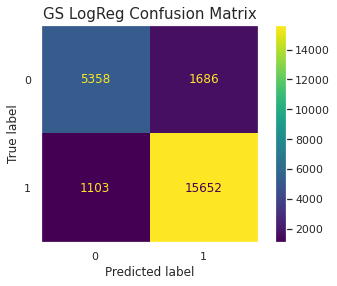

In [40]:
# Lets plot the confusion matrix to get a clearer view
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_fitted_grid.best_estimator_, X_test_scaled, y_test)
plt.grid(False)
plt.title('GS LogReg Confusion Matrix', fontsize=15)
plt.show()

In [41]:
#Now the classification report can be generated
report_logreg_gs = classification_report(y_test, y_pred_logreg_gs)
print(report_logreg_gs)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      7044
           1       0.90      0.93      0.92     16755

    accuracy                           0.88     23799
   macro avg       0.87      0.85      0.86     23799
weighted avg       0.88      0.88      0.88     23799



For this model we have an overall accuraxy of 88% which matches the accuracy for the test set from the checks done earlier. This is a great accuracy score overall, and we have a high recall rate of 93% for the spam reviews, with a 90% precision. These are really good results, meaning that out of all the possible spam reviews the model was able to correctly able to identify 93% of the spam reviews, with only a 7% misclassification. For classification models we want a higher recall rate because a lower recall rate indicates that lots of spam reviews are not being identified as spam and not being removed. This leads to products getting recommended more on the basis of spam reviews leading to a higher cost for the company. With a low recall rate, customers are more likely to purchase products with spam reviews that are bad quality, and are more likely to return the product for a refund. This drives up the cost for the company as they now have to process refunds, and handle the shipping of the product back to their warehouse or to the seller, also negativly impacting the company name and image to be associated with poor quality products, potentially causing a loss in customer base as they might seek out other sellers/providers for products they need.

The low recall rate for the real reviews is not as big of an issue since it would cost the company much less to simply have a human do an overview of the misclassified real reviews, and then correctly mark them as real before they get posted back onto the product. The human would be able to process lots of reviews manually at a lower cost than compared to issuing refunds for multiple products and bearing the return shipping costs.

The F1 score which is the harmonic mean of the precision and recall rates. An F1 score of 0.88 is great. Since we have a very close rate for the precision and recall the F1 score reflects that. An F1 score closer to 1 means the model is better at predicting the positive class (spam).

A quick check to try and increase the recall rate can be done by lowering the y_proba (classification probability rate) from the default value of 0.5, to an updated value of 0.2. Lets see what affect it has:

In [42]:
# Make probabilistic predictions (scores)
y_proba_logreg_gs = logreg_fitted_grid.best_estimator_.predict_proba(X_test_scaled)[:,1]

In [43]:
# First calculate precision and recall using the default (0.5) cut-off
y_threshold_logreg_gs = np.where(y_proba_logreg_gs > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold_logreg_gs)}")
print(f"Recall score: {recall_score(y_test, y_threshold_logreg_gs)}")
print(f"F1 score: {f1_score(y_test, y_threshold_logreg_gs)}")
print("")

# Calculate the same using a lower cut-off (0.2)
y_threshold_logreg_gs = np.where(y_proba_logreg_gs > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold_logreg_gs)}")
print(f"Recall score: {recall_score(y_test, y_threshold_logreg_gs)}")
print(f"F1 score: {f1_score(y_test, y_threshold_logreg_gs)}")

Threshold of 0.5:
Precision score: 0.9027569500519091
Recall score: 0.934168904804536
F1 score: 0.9181943507464876

Threshold of 0.2:
Precision score: 0.8476180623803858
Recall score: 0.9780364070426738
F1 score: 0.908168920416759


Summary of results:
1. Threshold goes down
2. We predict more samples as spam
3. We get more false positives which drives the precision down
4. We get more true positives that drive the recall up

So by reducing our y_proba threshold from 0.5 to 0.2, we are seeing a ~4% increase in the recall, but we also have a ~6% drop in the accuracy.

Getting a ~4% increase in the recall rate is huge! To put it into contect, if a million reviews are being misclassified on the daily, by changing the y_proba rate to 0.2 instead of the default 0.5, an extra 40,000 spam reviews will be correctly identified as spam. This would have a positive impact on reducing the costs associated with misclassified spam reviews, and increasing customer satisfaction and company image.

Now, I shall evaluate the GridSearch XGBoost model:

In [44]:
# Checking the results of the XGBoost model run
results_xgb = pd.DataFrame(xgb_fitted_grid.cv_results_)
results_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,146.905780,2.087690,0.652465,0.178203,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",0.5,8,50,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.863923,0.865835,0.870594,0.865063,0.865192,0.866121,0.002320,2
1,147.910148,2.486381,0.665017,0.182880,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",0.5,8,52,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.863537,0.865578,0.871623,0.866349,0.866092,0.866636,0.002682,1
2,176.684105,3.303843,0.730257,0.195043,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",0.5,10,50,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.863537,0.863391,0.870208,0.863905,0.867636,0.865735,0.002731,3
3,180.895254,3.025436,0.632501,0.144589,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",0.5,10,52,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.863666,0.863519,0.869694,0.862876,0.866864,0.865324,0.002587,4
4,145.054125,3.352879,0.652766,0.152186,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",1,8,50,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.859293,0.855030,0.860947,0.855673,0.860046,0.858198,0.002391,8
5,149.152781,1.806393,0.767181,0.218623,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",1,8,52,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.859678,0.857216,0.860046,0.857088,0.859789,0.858764,0.001322,5
6,178.800147,2.901707,0.722844,0.169494,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",1,10,50,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.855820,0.862233,0.858117,0.856316,0.859660,0.858429,0.002339,7
7,183.737794,2.348765,0.771566,0.218633,"XGBClassifier(learning_rate=0.5, max_depth=8, ...",1,10,52,MinMaxScaler(),"{'model': XGBClassifier(learning_rate=0.5, max...",0.855691,0.862876,0.858245,0.856702,0.860175,0.858738,0.002564,6


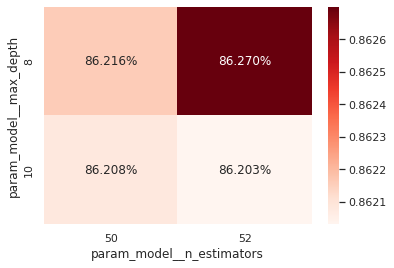

In [45]:
# Lets plot a heatmap for ease of interpretability
sns.heatmap(
    results_xgb.reset_index().pivot_table(index = "param_model__max_depth", columns = "param_model__n_estimators", values = "mean_test_score"),
    cmap = "Reds", annot = True, fmt = "0.3%"
)
plt.show()

As seen from the heatmap above, the best parameters were a max_depth of 10, and 52 number of estimators. 

Lets now check the Mean Absolute Erros and R-square values for the XGBoost model:

In [46]:
# Getting the predictions
xgb_y_pred_rem = xgb_fitted_grid.best_estimator_.predict(X_remainder_scaled)
xgb_y_pred_test = xgb_fitted_grid.best_estimator_.predict(X_test_scaled)

In [47]:
# Evaluate Model
print(f'GS XGBoost Remainder MAE --- {mean_absolute_error(y_remainder, xgb_y_pred_rem)}')
print(f'GS XGBoost Test MAE ---- {mean_absolute_error(y_test, xgb_y_pred_test)}')
print(f'GS XGBoost Remainder R2 ---- {r2_score(y_remainder, xgb_y_pred_rem)}')
print(f'GS XGBoost Test R2 ----- {r2_score(y_test, xgb_y_pred_test)}')

GS XGBoost Remainder MAE --- 0.10653508850912104
GS XGBoost Test MAE ---- 0.1342073196352788
GS XGBoost Remainder R2 ---- 0.4887527371772995
GS XGBoost Test R2 ----- 0.3559347892286724


Since, this is a classification problem, the MAE and R2 values do not shed any clear light on the model evalutaions.

Instead I shall plot the confusion matrix, and check the precision, recall, and F1 score. After that a quick plot for checking the change in the y_proba threshold and its effect on the precision and recall will be checked.

Lets plot the confusion matrix:

Text(0.5, 1.0, 'GS XGBoost Confusion Matrix')

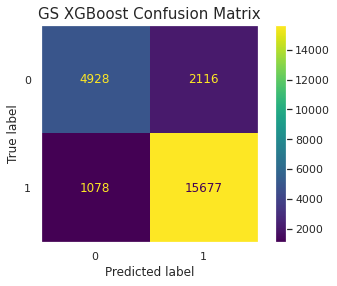

In [48]:
# Lets plot the confusion matrix to get a clearer view
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(xgb_fitted_grid.best_estimator_, X_test_scaled, y_test)
plt.grid(False)
plt.title('GS XGBoost Confusion Matrix', fontsize=15)
plt.show()

In [49]:
# Get class predictions
y_pred_xgb_gs = xgb_fitted_grid.best_estimator_.predict(X_test_scaled)

#Now the classification report can be generated
report_xgb = classification_report(y_test, y_pred_xgb_gs)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      7044
           1       0.88      0.94      0.91     16755

    accuracy                           0.87     23799
   macro avg       0.85      0.82      0.83     23799
weighted avg       0.86      0.87      0.86     23799



For this model we have an overall accuraxy of ~87% which matches the accuracy for the test set from the checks done earlier. This is a great accuracy score overall, and we have a high recall rate of 94% for the spam reviews, with a 88% precision. These are really good results, meaning that out of all the possible spam reviews the model was able to correctly able to identify 94% of the spam reviews, with only a 6% misclassification. For classification models we want a higher recall rate because a lower recall rate indicates that lots of spam reviews are not being identified as spam and not being removed. This leads to products getting recommended more on the basis of spam reviews leading to a higher cost for the company. With a low recall rate, customers are more likely to purchase products with spam reviews that are bad quality, and are more likely to return the product for a refund. This drives up the cost for the company as they now have to process refunds, and handle the shipping of the product back to their warehouse or to the seller, also negativly impacting the company name and image to be associated with poor quality products, potentially causing a loss in customer base as they might seek out other sellers/providers for products they need.

The low recall rate for the real reviews is not as big of an issue since it would cost the company much less to simply have a human do an overview of the misclassified real reviews, and then correctly mark them as real before they get posted back onto the product. The human would be able to process lots of reviews manually at a lower cost than compared to issuing refunds for multiple products and bearing the return shipping costs.

The F1 score which is the harmonic mean of the precision and recall rates. An F1 score of 0.86 is great, but this is still lower than the F1 score for the GridSearch LogisticRegression model. Since we have a very close rate for the precision and recall the F1 score reflects that. An F1 score closer to 1 means the model is better at predicting the positive class (spam).

A quick check to try and increase the recall rate can be done by lowering the y_proba (classification probability rate) from the default value of 0.5, to an updated value of 0.2. Lets see what affect it has:

In [50]:
# Make probabilistic predictions (scores)
y_proba_xgb_gs = xgb_fitted_grid.best_estimator_.predict_proba(X_test_scaled)[:,1]

In [51]:
# First calculate precision and recall using the default (0.5) cut-off
y_threshold_xgb_gs = np.where(y_proba_xgb_gs > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold_xgb_gs)}")
print(f"Recall score: {recall_score(y_test, y_threshold_xgb_gs)}")
print(f"F1 score: {f1_score(y_test, y_threshold_xgb_gs)}")
print("")

# Calculate the same using a lower cut-off (0.2)
y_threshold_xgb_gs = np.where(y_proba_xgb_gs > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold_xgb_gs)}")
print(f"Recall score: {recall_score(y_test, y_threshold_xgb_gs)}")
print(f"F1 score: {f1_score(y_test, y_threshold_xgb_gs)}")

Threshold of 0.5:
Precision score: 0.881076827966054
Recall score: 0.9356609967173978
F1 score: 0.907548917448188

Threshold of 0.2:
Precision score: 0.7986593364197531
Recall score: 0.9884213667561922
F1 score: 0.8834653650209383


Summary of results:
1. Threshold goes down
2. We predict more samples as spam
3. We get more false positives which drives the precision down
4. We get more true positives that drive the recall up

So by reducing our y_proba threshold from 0.5 to 0.2, we are seeing a ~5% increase in the recall, but we also have a ~8% drop in the accuracy.

Getting a ~5% increase in the recall rate is huge! To put it into contect, if a million reviews are being misclassified on the daily, by changing the y_proba rate to 0.2 instead of the default 0.5, an extra 50,000 spam reviews will be correctly identified as spam. This would have a positive impact on reducing the costs associated with misclassified spam reviews, and increasing customer satisfaction and company image.

Due to the higher drop in the precision, and only 1% extra increase in the recall rate, I would say that the GS LogisticRegression is the better model option. The main reason influencing my choise here is the run-time and computational resources required for a XGBoost model are much (more than triple the run-time for my GridSearch) higher in comparison with the LogisticRegression.

For the final model evaluation, I shall repeat the checks on the Baseline Logistic Regression model, and then come to a final decision about which model had the best performance.

Lets start by plotting the confusion matrix:

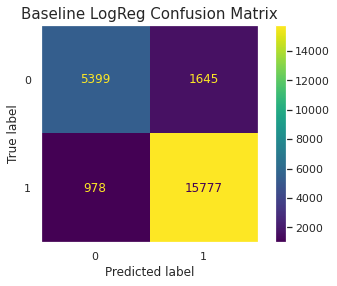

In [52]:
# Lets plot the confusion matrix to get a clearer view
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(baseline_logreg, X_test_scaled, y_test)
plt.grid(False)
plt.title('Baseline LogReg Confusion Matrix', fontsize=15)

#Saving the plot for Capstone EDA Showcase
plt.savefig('Baseline LogReg Confusion Matrix.jpeg', bbox_inches='tight')

plt.show()

In [53]:
# Get class predictions
y_pred_base_logreg = baseline_logreg.predict(X_test_scaled)

#Now the classification report can be generated
report_logreg_base = classification_report(y_test, y_pred_base_logreg)
print(report_logreg_base)

              precision    recall  f1-score   support

           0       0.85      0.77      0.80      7044
           1       0.91      0.94      0.92     16755

    accuracy                           0.89     23799
   macro avg       0.88      0.85      0.86     23799
weighted avg       0.89      0.89      0.89     23799



For this model we have an overall accuraxy of ~89% which matches the accuracy for the test set from the checks done earlier. This is a great accuracy score overall, and we have a high recall rate of 94% for the spam reviews, with a 91% precision. These are really good results, meaning that out of all the possible spam reviews the model was able to correctly able to identify 94% of the spam reviews, with only a 6% misclassification. For classification models we want a higher recall rate because a lower recall rate indicates that lots of spam reviews are not being identified as spam and not being removed. This leads to products getting recommended more on the basis of spam reviews leading to a higher cost for the company. With a low recall rate, customers are more likely to purchase products with spam reviews that are bad quality, and are more likely to return the product for a refund. This drives up the cost for the company as they now have to process refunds, and handle the shipping of the product back to their warehouse or to the seller, also negativly impacting the company name and image to be associated with poor quality products, potentially causing a loss in customer base as they might seek out other sellers/providers for products they need.

The low recall rate for the real reviews is not as big of an issue since it would cost the company much less to simply have a human do an overview of the misclassified real reviews, and then correctly mark them as real before they get posted back onto the product. The human would be able to process lots of reviews manually at a lower cost than compared to issuing refunds for multiple products and bearing the return shipping costs.

The F1 score which is the harmonic mean of the precision and recall rates. An F1 score of 0.89 is great, this is the highest F1 score out of all three models being evaluated. Since we have a very close rate for the precision and recall the F1 score reflects that. An F1 score closer to 1 means the model is better at predicting the positive class (spam).

A quick check to try and increase the recall rate can be done by lowering the y_proba (classification probability rate) from the default value of 0.5, to an updated value of 0.2. Lets see what affect it has:

In [54]:
# Make probabilistic predictions (scores)
y_proba_logreg_base = baseline_logreg.predict_proba(X_test_scaled)[:,1]

In [55]:
# First calculate precision and recall using the default (0.5) cut-off
y_threshold_logreg_base = np.where(y_proba_logreg_base > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold_logreg_base)}")
print(f"Recall score: {recall_score(y_test, y_threshold_logreg_base)}")
print(f"F1 score: {f1_score(y_test, y_threshold_logreg_base)}")
print("")

# Calculate the same using a lower cut-off (0.2)
y_threshold_logreg_base = np.where(y_proba_logreg_base > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold_logreg_base)}")
print(f"Recall score: {recall_score(y_test, y_threshold_logreg_base)}")
print(f"F1 score: {f1_score(y_test, y_threshold_logreg_base)}")

Threshold of 0.5:
Precision score: 0.9055791527953163
Recall score: 0.9416293643688451
F1 score: 0.9232524797378355

Threshold of 0.2:
Precision score: 0.8384689578151175
Recall score: 0.9857952849895554
F1 score: 0.9061831349097493


Summary of results:
1. Threshold goes down
2. We predict more samples as spam
3. We get more false positives which drives the precision down
4. We get more true positives that drive the recall up

So by reducing our y_proba threshold from 0.5 to 0.2, we are seeing a ~4.5% increase in the recall, but we also have a ~7% drop in the accuracy.

Getting a ~4.5% increase in the recall rate is huge! To put it into contect, if a million reviews are being misclassified on the daily, by changing the y_proba rate to 0.2 instead of the default 0.5, an extra 45,000 spam reviews will be correctly identified as spam. This would have a positive impact on reducing the costs associated with misclassified spam reviews, and increasing customer satisfaction and company image.

Lets create a summary table for all of the precision and recall rate updates with the drop in the threshold for all three models:

|                                |                                                                          |                     |  Threshold = 0.5 |              |   |                     |  Threshold = 0.2 |              |
|--------------------------------|--------------------------------------------------------------------------|:-------------------:|:----------------:|:------------:|---|:-------------------:|:----------------:|:------------:|
| Model                          |                         Default Model Parameters                         | Precision Score (%) | Recall Score (%) | F1 Score (%) |   | Precision Score (%) | Recall Score (%) | F1 Score (%) |
| GS - Logistic Regression       |       C = 1, penalty = 'l1', random_state = 1, solver = 'saga'      |        90.27        |       93.42      |     91.82    |   |        84.76        |       97.80     |     90.81    |
| GS - XGBoost                   | learning_rate = 0.5, max_depth = 8, n_estimators = 52, random_state = 1 |        88.11        |       93.57      |     90.75    |   |        79.87        |       98.84      |     88.34    |
| Baseline - Logistic Regression |                  C = 1, penalty = 'l2', solver = 'lbfgs'                 |        90.55        |       94.16      |     92.32    |   |        83.85        |       98.58      |     90.62    |


On the basis of these results, the Baseline Logistic Regression model has the best performance, and is selected as the best model for this project.

### Final Model

There are certain advantages to the baseline Logistic Regression in comparison with the current Grid Search result:
- Easier to run the LogisticRegression model with the base/default hyperparameters (no extran tuning/optimization required)
- Much quicker to run (less time wasted waiting around for results)
- Less computationally heavy (can be easily run on a local machine - depending on the size of the dataset)
- Easy to interpret and evaluate (less black box models/calculations)

Now that I have landed on my best/final model. Another check for the Baseline Logistic Regression is to plot out the change in the precision and recall scores based on a range of threshold values. By doing this I aim to find the optimal threhold value which would lead to the highest recall rate.

Lets save the best model to a pickle file using joblib:

In [56]:
# To "pickle" things, like accuracies or even an entire fitted model, import the joblib library
import joblib

# Saving the best final model - baseline logistic regression
joblib.dump(baseline_logreg, '/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/pickled_best_final_logreg.pkl')

['/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/pickled_best_final_logreg.pkl']

Now that the best final model have been saved/pickled. Lets plot the the threshold check:

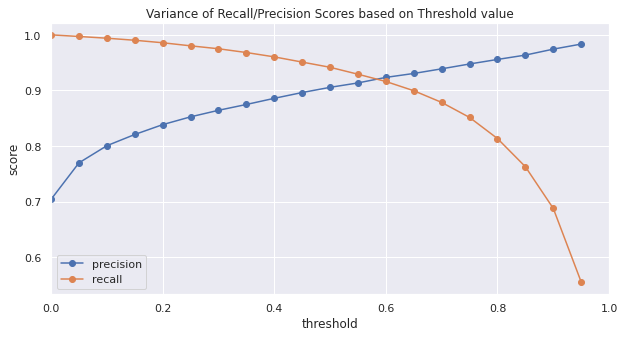

In [57]:
# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0, 1, 0.05)

precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba_logreg_base > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.title('Variance of Recall/Precision Scores based on Threshold value')
plt.legend()

#Saving the plot for Capstone Report
plt.savefig('/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/Variance of Recall-Precision Scores based on Threshold value.jpeg', bbox_inches='tight')

plt.show()

From the plot above, it looks like that the optimal threshold value might be between 0.2 and 0.4. 

Deciding the final threshold would depend on a few real-world factors such as:
- Industry or Company standard (what is the min % of spam to be caught)
- The cost associated with misclassifying a real review for spam and vice versa

As a final check for comparing the true positive rates (TPR - how many spam reviews are correctly being classified as spam AKA recall) and false positive rates (FPR - how many real reviews are being misclassified as spam), the Receiver Operating Characteristic (ROC) curve will be plot.

Via the ROC Curve I aim to check the Area Under the Curve (AUC) value which represents how well the model is able to distinguish between the real and spam reviews.

AUC Score definition:
- 1 = model is perfectly able to distinguish between real and spam reviews
- 0.5 = model is unable to distinguish between real and spam reviews
- 0 = the model is predicting all real reviews as spam and vice versa

Lets plot the ROC-AUC now:

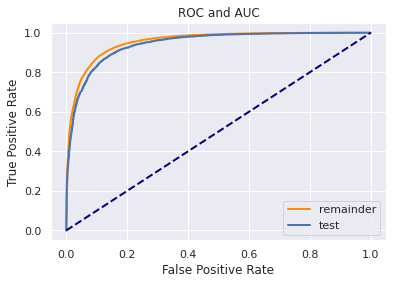

Test AUC score: 0.9433393644010425
RemainderAUC score: 0.9546528678361192


In [59]:
# Import the ROC and AUC libraries
from sklearn.metrics import roc_curve, roc_auc_score

# Get class predictions
y_proba_base_logreg_test = baseline_logreg.predict_proba(X_test_scaled)[:,1]
y_proba_base_logreg_rem = baseline_logreg.predict_proba(X_remainder_scaled)[:,1]

# Set-up the FPR, TPR, and thresholds
fprs, tprs, thresholds = roc_curve(y_test.values.ravel(), y_proba_base_logreg_test)
roc_auc = roc_auc_score(y_test.values.ravel(), y_proba_base_logreg_test)
fprs_rem, tprs_rem, thresholds_rem = roc_curve(y_remainder, y_proba_base_logreg_rem)
roc_auc_rem = roc_auc_score(y_remainder, y_proba_base_logreg_rem)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_rem, tprs_rem, color='darkorange', lw=2, label='remainder')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")

#Saving the plot for Capstone Report
plt.savefig('/content/drive/MyDrive/Data Science Bootcamp/Capstone/Spam Detection/Final Submission/ROC and AUC - Best Model.jpeg', bbox_inches='tight')

plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"RemainderAUC score: {roc_auc_rem}")

Based on the AUC score, there is a ~0.95 probability that the classifier will correctly classify a randomly chosen spam review. This is a great result, indicating that the model will perform very well for the spam detection.

# 6 - Conclusion

Based on all the advanced modelling conducted in this notebook, the Baseline LogisticRegression model with the default hyperparameters was the most successful at classifying the real and spam reviews.

Best Model Parameters:

| Model                          |         Default Model Parameters        | Remainder Accuracy (%) | Test Accuracy (%) |
|--------------------------------|:---------------------------------------:|:----------------------:|:-----------------:|
| Baseline - Logistic Regression | C = 1, penalty = 'l2', solver = 'lbfgs' |          90.03         |       88.98       |

Future Steps:
- Search for less biased data
- Engineer some features from the dataset
- Conduct a WordEmbedding analysis
- Run an ML Pipeline with GridSearch on a wider array or models and hyperparameters (possibly via AWS due to computational limits with local machine)
